# 1. Librerías y funciones

In [23]:
import pandas as pd                   # manipulación de datos 
import numpy as np                    # librería numérica
import matplotlib.pyplot as plt       # librería de graficación
from matplotlib import cm             # librería para el color de barras de color
import seaborn as sns;                # librería para decoración de gráficos
import datetime as datetime           # librería para manejo de fechas y hora
from sklearn.decomposition import PCA # librería para descomposición en componetes principales


In [24]:
# Función para leer el archivo de datos
def leerCSV(filename):
    df = pd.read_csv(filename,sep='\t');
    df['FECHA']=pd.to_datetime(df['FECHA'],format='%Y/%m/%d')
    df['HORA']=pd.to_datetime(df['HORA'],format='%H:%M:%S')
    hora=[''] * df["HORA"].size
    for ind in df.index:
        x=df["HORA"][ind]
        hora[ind]=x.strftime("%H")
    df["HORA"]=hora
    columnas={'KVA_Tot'           : 'S',      #Potencia aparente
              'kVAr_Tot'          : 'Q',      #Potencia reactiva
              'kW_Tot'            : 'P',      #Potencia activa
              'I_A'               : 'Ia',
              'I_B'               : 'Ib',
              'I_C'               : 'Ic',
              'V_A_B'             : 'Vab',
              'V_B_C'             : 'Vbc',
              'V_C_A'             : 'Vca'}
    df=df.rename(columns=columnas)
    return df;

# Función para construir la tabla de consumo horario
def tabla(df,col):
    dd=df.groupby(['FECHA','HORA'])[[col]].mean().unstack()
    dd.replace([np.inf, -np.inf], np.nan, inplace=True)
    dd=dd.dropna()
    return dd

# 2. Lectura del archivo

El archivo *data.csv* contiene los valores de varias variables medidas cada hora por un AMI. Los datos corresponden al consumo de energía eléctrica del campus Bogotá de la Universidad Nacional de Colombia. 

En este laboratorio trabajaremos solo con una de esas variables, la Potencia Activa promedio, que correponde a la columna 'P' del *Dataframe*

Una vez creado el *Dataframe*, graficamos los valores de la columna de interés.

In [25]:
filename="data-03.csv"
df=leerCSV(filename)
df.head(3)

,FECHA,HORA,Ia,Ib,Ic,S,Q,P,Vab,Vbc,Vca
0,2016-10-05,11,109.287041,110.147362,110.887047,2103.854248,277.951416,2085.457520,11013.016602,11043.222656,11054.016602
1,2016-10-05,12,111.300003,111.064903,113.138161,2197.022217,328.640533,2172.846680,11079.030273,11115.412109,11123.236328
2,2016-10-05,13,105.136642,105.236641,107.071754,2051.411865,302.450409,2028.595215,11192.564453,11220.931641,11235.480469


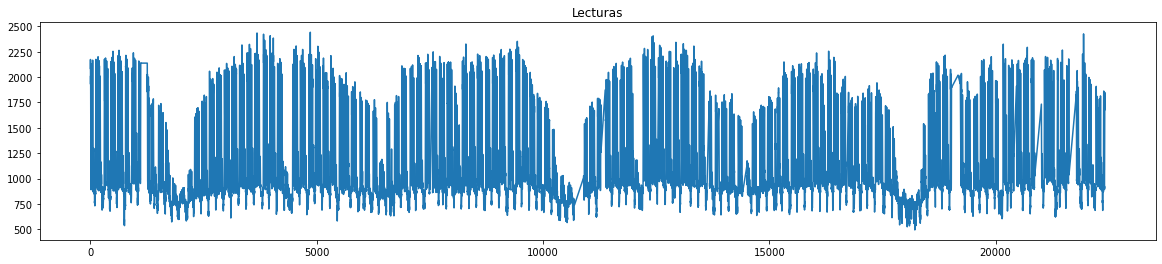

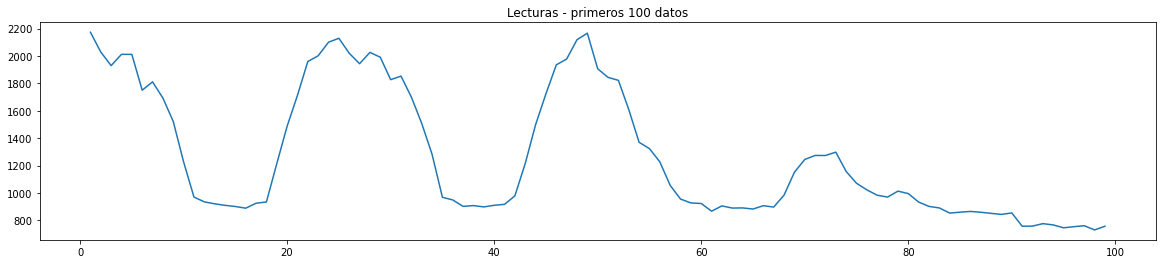

In [26]:
plt.figure(figsize=(20,4))
plt.plot(df['P'])
plt.title("Lecturas")
plt.show()

plt.figure(figsize=(20,4))
plt.title("Lecturas - primeros 100 datos")
plt.plot(df['P'][1:100])
plt.show()

## 3. Tabla de consumos horarios

Para obtener el perfil horario, vamos a construir una tabla que tiene una columna por cada una de las 24 franjas horarias, y una fila por cada día medido.

Utilizamos la función **groupby()** para construir la tabla. Otra alternativa consiste en construir tablas dinámicas (tablas pivote) mediante el uso de la función **pivot_table()**

In [27]:
dd=tabla(df,'P')
dd.head(3)

P                                                  \
HORA                00          01          02          03          04   
FECHA                                                                    
2016-10-06  921.172729  909.789795  901.455444  889.117310  925.272522   
2016-10-07  902.199280  908.160095  898.439270  910.196350  917.097778   
2016-10-08  867.254333  905.887878  889.964294  891.111023  882.920410   

                                                                            \
HORA                05           06           07           08           09   
FECHA                                                                        
2016-10-06  934.404297  1213.686035  1487.140259  1712.778320  1959.408936   
2016-10-07  979.000000  1215.036011  1498.279053  1723.501953  1934.739258   
2016-10-08  907.237183   897.225891   984.428711  1150.927979  1244.569702   

            ...                                                      \
HORA        ...           14           15           16           17   
FECHA       ...                                                       
2016-10-06  ...  1943.210083  2026.000000  1990.385986  1826.824951   
2016-10-07  ...  1843.640991  1821.871216  1608.905273  1369.766113   
2016-10-08  ...  1070.857788  1022.644958   983.592285   970.075317   

                                                                            \
HORA                 18           19           20           21          22   
FECHA                                                                        
2016-10-06  1852.635254  1700.056885  1507.968750  1282.507446  968.780823   
2016-10-07  1323.667603  1227.344482  1055.621338   955.851868  927.400879   
2016-10-08  1013.555237   995.684875   933.690186   902.209167  890.819153   

                        
HORA                23  
FECHA                   
2016-10-06  949.237732  
2016-10-07  923.299011  
2016-10-08  853.493896  

[3 rows x 24 columns]

Podemos obtener el consumo diario sumando horizontalmente los consumos de cada día:

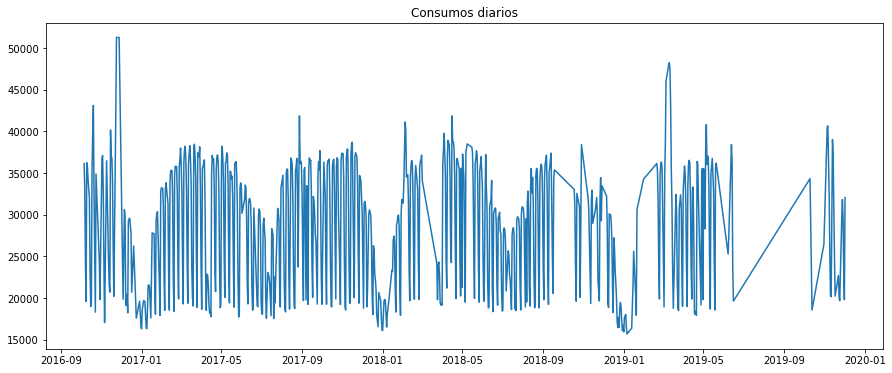

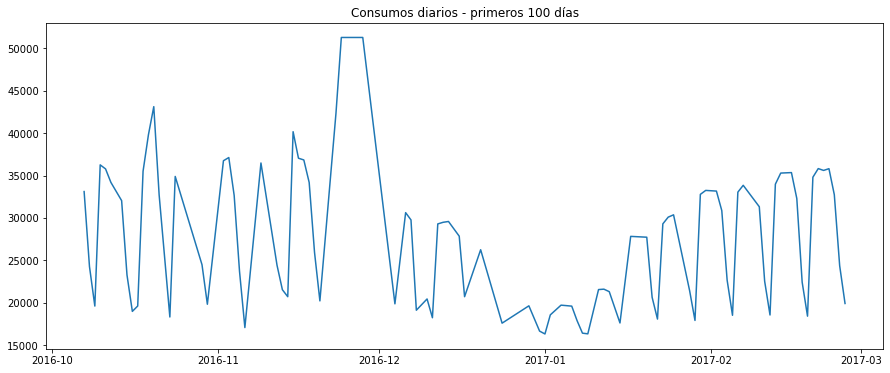

In [28]:
plt.figure(figsize=(15,6))
plt.title("Consumos diarios")
plt.plot(dd['P'].sum(axis=1))
plt.show()

plt.figure(figsize=(15,6))
plt.title("Consumos diarios - primeros 100 días")
plt.plot(dd['P'][1:100].sum(axis=1))
plt.show()

## 4. Perfil promedio

Para analizar cómo varía el consumo a lo largo de las 24 horas, caculamos el valor promedio para cada una de las 24 columnas y lo graficamos. Es conveniente graficar simultánemente los valores mínimos y máximos, para tener una idea de cómo es la variación a lo largo de todo el periodo estudiado.

Con ese mismo propósito, trazamos los diagramas de cajas de cada una de las 24 franjas horarias.

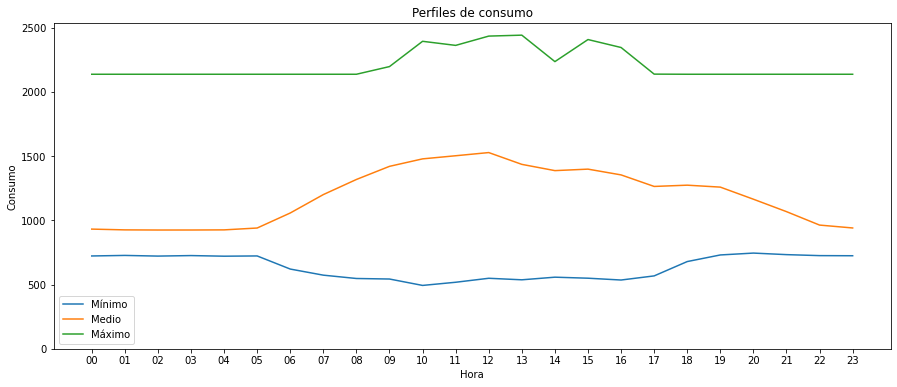

In [29]:
plt.figure(figsize=(15,6))
plt.plot(dd['P'].min(axis=0),label='Mínimo')
plt.plot(dd['P'].mean(axis=0),label='Medio')
plt.plot(dd['P'].max(axis=0),label='Máximo')
plt.xlabel('Hora')
plt.ylabel('Consumo')
plt.ylim(bottom=0)
plt.title('Perfiles de consumo')
plt.legend()
plt.show()



In [35]:
dd.head()

P                                                  \
HORA                00          01          02          03          04   
FECHA                                                                    
2016-10-06  921.172729  909.789795  901.455444  889.117310  925.272522   
2016-10-07  902.199280  908.160095  898.439270  910.196350  917.097778   
2016-10-08  867.254333  905.887878  889.964294  891.111023  882.920410   
2016-10-09  859.976257  865.543945  859.423706  851.339478  843.659363   
2016-10-10  855.023499  875.832581  845.382507  849.773682  852.233276   

                                                                            \
HORA                05           06           07           08           09   
FECHA                                                                        
2016-10-06  934.404297  1213.686035  1487.140259  1712.778320  1959.408936   
2016-10-07  979.000000  1215.036011  1498.279053  1723.501953  1934.739258   
2016-10-08  907.237183   897.225891   984.428711  1150.927979  1244.569702   
2016-10-09  854.577148   757.530090   758.335449   776.339050   766.956421   
2016-10-10  850.001465  1157.502319  1523.006470  1699.486816  1919.125244   

            ...                                                      \
HORA        ...           14           15           16           17   
FECHA       ...                                                       
2016-10-06  ...  1943.210083  2026.000000  1990.385986  1826.824951   
2016-10-07  ...  1843.640991  1821.871216  1608.905273  1369.766113   
2016-10-08  ...  1070.857788  1022.644958   983.592285   970.075317   
2016-10-09  ...   757.390747   751.920959   799.885010   762.306030   
2016-10-10  ...  1923.322388  2035.489624  2004.330933  1855.539795   

                                                                             \
HORA                 18           19           20           21           22   
FECHA                                                                         
2016-10-06  1852.635254  1700.056885  1507.968750  1282.507446   968.780823   
2016-10-07  1323.667603  1227.344482  1055.621338   955.851868   927.400879   
2016-10-08  1013.555237   995.684875   933.690186   902.209167   890.819153   
2016-10-09   910.740906   894.272644   916.829773   909.069702   876.032349   
2016-10-10  1930.772583  1746.042114  1584.268555  1300.804443  1064.599365   

                        
HORA                23  
FECHA                   
2016-10-06  949.237732  
2016-10-07  923.299011  
2016-10-08  853.493896  
2016-10-09  841.345703  
2016-10-10  985.348450  

[5 rows x 24 columns]

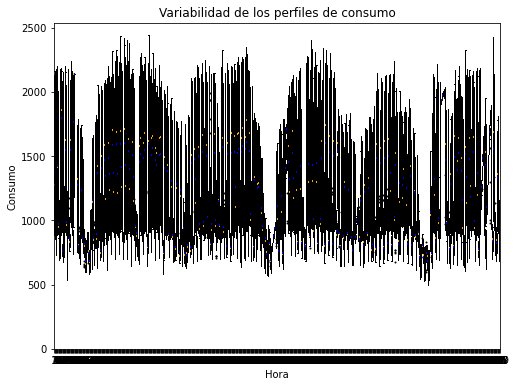

In [37]:
plt.figure(figsize=(8,6))
flierprops = dict(marker='o', markerfacecolor='black', markersize=2,markeredgecolor='none')
medianprops = dict(linestyle='--', linewidth=2, color='orange')
meanprops = dict(linestyle='--', linewidth=2, color='blue')

plt.boxplot(dd['P'],flierprops=flierprops,showmeans=True,
            meanprops =meanprops,meanline=True,medianprops=medianprops)
plt.xlabel('Hora')
plt.ylabel('Consumo')
plt.ylim(bottom=0)
plt.title('Variabilidad de los perfiles de consumo')
plt.show()

# 5. Normalizaciones (estandarizaciones)

Para la aplicación de varios algoritmos de modelamiento es conveniente llevar los datos a valores en rangos comparables. En este ejemplo llevaremos los datos de consumo al intervalo $[0,1]$, mediante un escalador $\max - \min$. Utilizaremos tres estrategias para determinar los valores máximo y mínimo:

* Valores matriciales
* Valores por columna
* Valores por fila (participación horaria del consumo)

Una vez efectuada la normalización, calculamos el perfil medio para observar las diferencias entre las tres estrategias.

In [45]:
# Matricial
def normalizarA(dd):
    unos=np.ones(shape=dd.min().shape)
    mn=min(dd.min())*unos
    mx=max(dd.max())*unos
    ddN=((dd-mn)/(mx-mn))
    return ddN

# Por columnas
def normalizarB(dd):
    ddN=((dd-dd.min())/(dd.max()-dd.min()))
    return ddN

# Por filas
def normalizarC(dd):
    cols=dd.columns
    ddN=dd.copy();
    media=ddN.mean(axis=1)
    for col in cols:
        ddN[col]=(ddN[col])/media
    unos=np.ones(shape=ddN.min().shape)
    mn=min(ddN.min())*unos
    mx=max(ddN.max())*unos
    ddN=((ddN-mn)/(mx-mn))
    return ddN

def franjas(min = 0, max = 24):
    fr=[]
    for i in range(min,max):
        mistr="{:02d}"
        mistr=mistr.format(i)
        fr.append(mistr)
    return fr


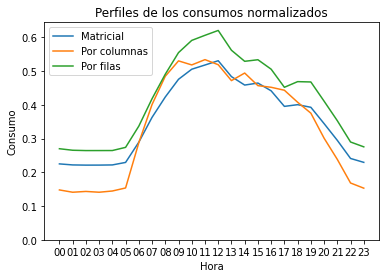

In [39]:
ddNA=normalizarA(dd['P'])
ddNB=normalizarB(dd['P'])
ddNC=normalizarC(dd['P'])

fr=franjas()
plt.figure(figsize=(6,4))
plt.plot(ddNA[fr].mean(axis=0),label='Matricial')
plt.plot(ddNB[fr].mean(axis=0),label='Por columnas')
plt.plot(ddNC[fr].mean(axis=0),label='Por filas')
plt.xlabel('Hora')
plt.ylabel('Consumo')
plt.ylim(bottom=0)
plt.title('Perfiles de los consumos normalizados')
plt.legend()
plt.show()

# 6.  Una visualización particular

Es posible explorar gráficamente y de forma simultánea el efecto en el consumo del día del año y del día de la semana.

Para ello usaremos como eje horizontal el día del año, mientras que el día de la semana será representado por un color.

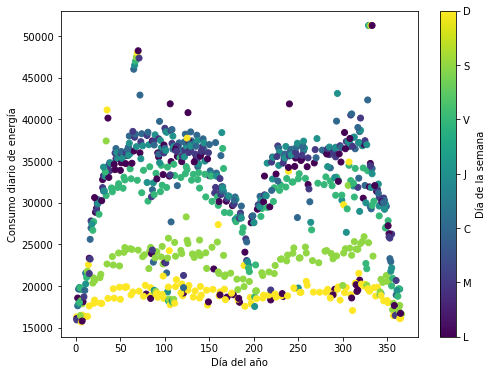

In [40]:
fr=franjas()
DOW=[]
DOY=[]
FF=dd.index.date
for i in range(0,len(FF)):
    DOW.append(FF[i].isoweekday())
    DOY.append(FF[i].timetuple().tm_yday)

PDIARIA=dd['P'][fr].sum(axis=1)
plt.figure(figsize=(8,6))
plt.scatter(DOY,PDIARIA,c=DOW,cmap=cm.viridis)
cbar=plt.colorbar(label='Día de la semana')
cbar.ax.set_yticklabels(['L','M','C','J','V','S','D'])
plt.xlabel("Día del año")
plt.ylabel("Consumo diario de energía")
plt.show()

## 7. Análisis de componentes principales

Para efctuar un análisis de componentes principales, emplearemos la librería *sklearn.decomposition*.

Inicialmente exploramos qué tanta información sobre la varianza aporta cada uno de los componentes que se obtiene con la descomposición:

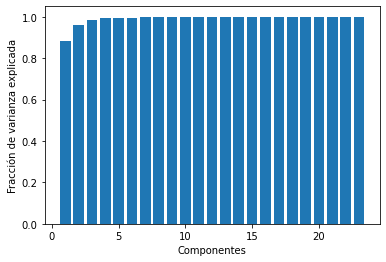

In [41]:
x=[]
y=[]
for i in range(1,24):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(dd['P'][fr].values)
    x.append(np.sum(pca.explained_variance_ratio_))
    y.append(i)
plt.bar(y,x)
plt.xlabel('Componentes')
plt.ylabel('Fracción de varianza explicada')
plt.show()

Podemos graficar los dos primeros componentes para intentar entender su significado. Sin embargo, no es na tarea sencilla, porque están en un espacio vectorial diferente al original.

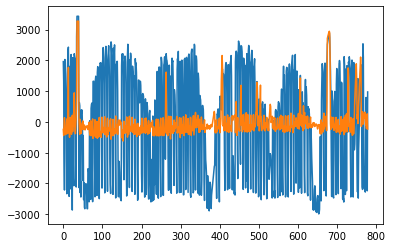

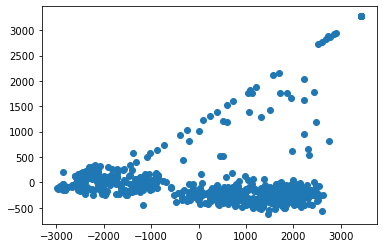

In [42]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(dd['P'][fr].values)
plt.plot(principalComponents)
plt.show()

plt.scatter(principalComponents.transpose()[0],principalComponents.transpose()[1])
plt.show()

## 8. Ejercicio sugerido

¿Cuál es el valor del perfil medio en la franja horaria de las 12:00 a las 13:00, con acad una de las tres normalizaciones?

In [44]:
ddNA

HORA,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
FECHA,,,,,,,,,,,,,,,,,,,,,
2016-10-06,0.219631,0.213788,0.209510,0.203176,0.221736,0.226424,0.369790,0.510165,0.625993,0.752598,...,0.744283,0.786782,0.768500,0.684538,0.697787,0.619463,0.520857,0.405118,0.244070,0.234038
2016-10-07,0.209891,0.212951,0.207961,0.213997,0.217539,0.249316,0.370483,0.515882,0.631498,0.739935,...,0.693170,0.681995,0.572671,0.449912,0.426248,0.376801,0.288649,0.237433,0.222828,0.220723
2016-10-08,0.191953,0.211785,0.203611,0.204199,0.199995,0.212478,0.207338,0.252103,0.337574,0.385644,...,0.296470,0.271721,0.251674,0.244735,0.267055,0.257881,0.226057,0.209897,0.204050,0.184889
2016-10-09,0.188217,0.191075,0.187933,0.183783,0.179841,0.185445,0.135627,0.136041,0.145282,0.140466,...,0.135556,0.132748,0.157370,0.138079,0.214276,0.205822,0.217402,0.213418,0.196459,0.178653
2016-10-10,0.185674,0.196356,0.180725,0.182979,0.184242,0.183096,0.340948,0.528576,0.619170,0.731919,...,0.734074,0.791654,0.775659,0.699278,0.737898,0.643069,0.560024,0.414511,0.293258,0.252575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-28,0.225997,0.224515,0.219944,0.233123,0.235813,0.243896,0.365126,0.436797,0.509892,0.571867,...,0.584923,0.597202,0.556178,0.449936,0.531934,0.503740,0.424565,0.357795,0.250247,0.224290
2019-11-29,0.221582,0.210000,0.224910,0.208552,0.213410,0.230041,0.324957,0.459689,0.523125,0.535490,...,0.563127,0.531749,0.431743,0.327819,0.368369,0.320039,0.281983,0.245184,0.231080,0.226429
2019-11-30,0.222045,0.210425,0.207409,0.201900,0.205021,0.212373,0.227630,0.298389,0.318292,0.343202,...,0.258587,0.238544,0.227761,0.246158,0.278027,0.259328,0.250759,0.225104,0.201271,0.200288


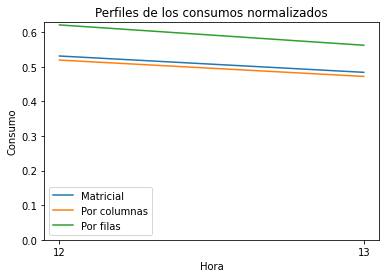

In [46]:
ddNA=normalizarA(dd['P'])
ddNB=normalizarB(dd['P'])
ddNC=normalizarC(dd['P'])

fr=franjas(12, 14)
plt.figure(figsize=(6,4))
plt.plot(ddNA[fr].mean(axis=0),label='Matricial')
plt.plot(ddNB[fr].mean(axis=0),label='Por columnas')
plt.plot(ddNC[fr].mean(axis=0),label='Por filas')
plt.xlabel('Hora')
plt.ylabel('Consumo')
plt.ylim(bottom=0)
plt.title('Perfiles de los consumos normalizados')
plt.legend()
plt.show()

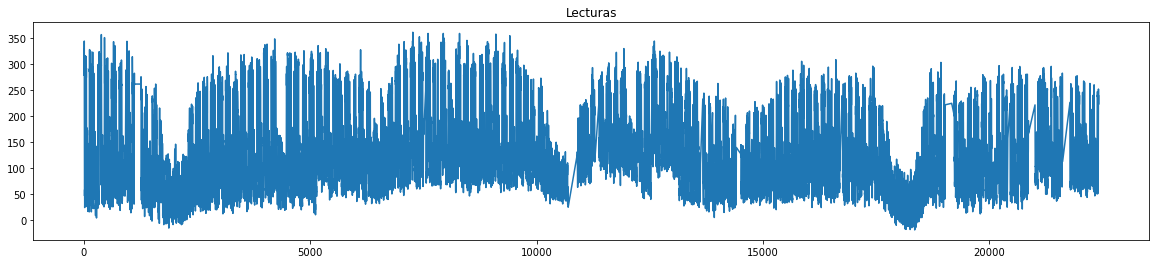

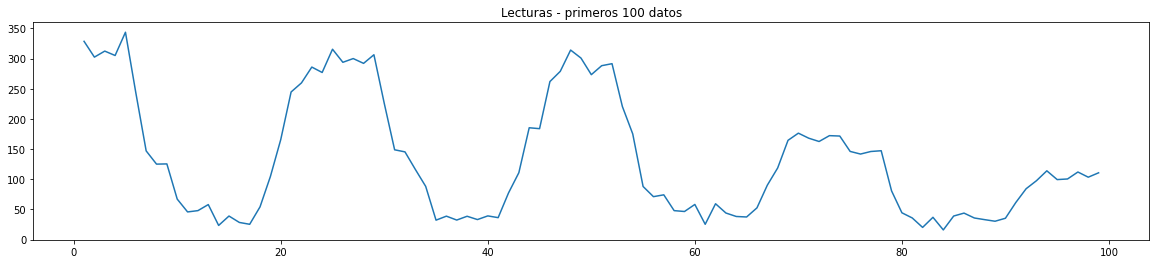

In [50]:
plt.figure(figsize=(20,4))
plt.plot(df['Q'])
plt.title("Lecturas")
plt.show()

plt.figure(figsize=(20,4))
plt.title("Lecturas - primeros 100 datos")
plt.plot(df['Q'][1:100])
plt.show()